## Introduction

The purpose of this project is to perform a data visualization analysis on the sentiment of tweets related to "Nestle Smarties" 
and to explore whether there is any correlation between the sentiment of tweets and the stock market of company producing 
'Smarties' i.e. 'Nestle'. Smarties are colour-varied sugar-coated chocolate confectionery., and we want to explore how and why people's sentiment towards this brand has changed over time and if it has any impact on the stock market.

## Data Exploration

We obtained the tweet data using Twitter's API, and the stock market data was collected from Yahoo Finance. We extracted 
tweets containing the keyword related to "Smarties" from 2010 to 2023 and used natural language processing techniques to perform 
sentiment analysis on the tweets. The sentiment analysis classified the tweets into positive, negative, or neutral categories 
based on the sentiment expressed in the tweet.

Next, we explored how the sentiment of tweets changed over time. We created wordclouds and line plots to visualize the 
sentiment trends over time and identified any major spikes or dips in sentiment as well as stock market. We also analyzed 
whether certain events or trends affected the sentiment of tweets towards Smarties, such as the introduction of new flavors or 
packaging, or any negative news related to the brand.

In [13]:
# Importing all the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS

import itertools
from scipy.stats import pearsonr

In [14]:
# Read the dataset after all the required preprocessing is performed 
df = pd.read_csv('Nestle Preprocessed.csv') # this is the overall nestle dataset
df.head()

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Month,Day,polarity
0,30-12-2010,love nestl tvc realli awesom,0,0,366,2010,12,30,positive
1,30-12-2010,rt loreal continu work nestl time analyst pond...,0,0,17221,2010,12,30,neutral
2,29-12-2010,hot nestl nesquik 125 coupon printablecoupon c...,0,1,7771,2010,12,29,positive
3,28-12-2010,oatmeal scotchi best cooki ever nestl,0,0,1811,2010,12,28,positive
4,28-12-2010,rt us muslim new consum nich nestl increas hal...,0,1,3291,2010,12,28,positive


In [15]:
df = df.drop(['Month', 'Day', 'polarity'],axis=1)

In [16]:
# Filter the rows containing the keyword "smarti"
smarties = df[df['Text'].str.contains('smarti', case=False)] # extract dataset of tweets that contain 'smarti' in it

In [17]:
# import the Natural Language Toolkit (nltk) library
import nltk
#nltk.download('vader_lexicon')

# import the SentimentIntensityAnalyzer class from the vader module in the nltk.sentiment package to perform sentiment analysis on text.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# initialize VADER
sid = SentimentIntensityAnalyzer()

# define a function to get the sentiment score for each tweet
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# apply the function to the 'text' column and create a new 'sentiment_score' column for 'maggi' dataset
smarties['Sentiment Score'] = smarties['Text'].apply(get_sentiment_score)

C:\Users\HP\AppData\Local\Temp/ipykernel_21116/4026041689.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smarties['Sentiment Score'] = smarties['Text'].apply(get_sentiment_score)


In [18]:
# define a function to map the sentiment scores to categories
def get_sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# map the sentiment scores to categories and create a new 'category' column
smarties['Polarity'] = smarties['Sentiment Score'].apply(get_sentiment_category)

smarties.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_21116/906690789.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smarties['Polarity'] = smarties['Sentiment Score'].apply(get_sentiment_category)


,Date,Text,Like Count,Retweet Count,Follower Count,Year,Sentiment Score,Polarity
166,28-11-2010,spoke nestl last week confirm halal uk qt smar...,0,0,159,2010,0.4215,Positive
486,14-10-2010,nestl fight obes buy 60 kit kat pack smarti mi...,0,0,1369,2010,-0.3818,Negative
526,09-10-2010,cut chocol diet cocoa bean pick child africa n...,0,0,176,2010,-0.8885,Negative
550,04-10-2010,askrodgilbert smarti answear one question swee...,0,0,668,2010,0.4588,Positive
636,27-09-2010,orang smarti longer tast orang nestl what go,0,0,266,2010,0.0000,Neutral


In [110]:
# Get the value_counts for all 3 categories of 'Polarity'
smarties['Polarity'].value_counts()

Positive    6611
Neutral     5512
Negative    1185
Name: Polarity, dtype: int64

In [111]:
smarties_pos_neg = pd.DataFrame(smarties['Polarity'].value_counts())

In [112]:
smarties_pos_neg.to_csv('smarties_pos_neg%.csv')

In [113]:
# eliminate the tweets with 'Neutral' sentiment and to focus analysis on the tweets that have a stronger emotional content
smarties = smarties[smarties['Polarity']!='Neutral']

In [114]:
# convert the 'Date' column of the 'maggi' DataFrame to a datetime format using the pandas to_datetime() method
smarties['Date'] = pd.to_datetime(smarties['Date'])

C:\Users\HP\AppData\Local\Temp/ipykernel_21116/2907356653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smarties['Date'] = pd.to_datetime(smarties['Date'])


In [115]:
# Extract the year from the Date column
smarties['Year'] = smarties['Date'].dt.year

C:\Users\HP\AppData\Local\Temp/ipykernel_21116/2906603647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smarties['Year'] = smarties['Date'].dt.year


### Yearly Line plot of polarity from 2010-2023

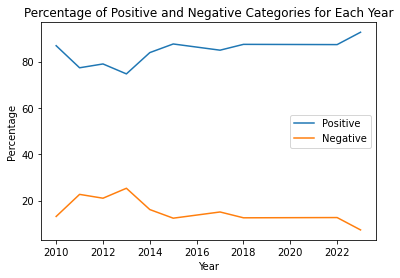

In [116]:
# group the 'maggi' DataFrame by 'Year' and counts the number of tweets in each year using the groupby() and count() methods.
total_counts = smarties.groupby('Year')['Polarity'].count()

# calculates the percentage of positive and negative tweets for each year by filtering the 'maggi' DataFrame based on the 'Polarity' column and applying the groupby() and count() methods
positive_perc = smarties[smarties['Polarity'] == 'Positive'].groupby('Year')['Polarity'].count() / total_counts * 100
negative_perc = smarties[smarties['Polarity'] == 'Negative'].groupby('Year')['Polarity'].count() / total_counts * 100

# Plot the percentages of positive and negative tweets for each year
plt.plot(positive_perc.index, positive_perc.values, label='Positive')
plt.plot(negative_perc.index, negative_perc.values, label='Negative')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Positive and Negative Categories for Each Year')
plt.legend()

# Show the plot
plt.show() 

# Negative sentiment is high and positive is low in 2011, 2013 and 2015

In [117]:
print(negative_perc)

Year
2010    13.161876
2011    22.687609
2012    21.033868
2013    25.323475
2014    16.134752
2015    12.416107
2017    15.094340
2018    12.579618
2022    12.684989
2023     7.352941
Name: Polarity, dtype: float64


In [118]:
smartie = pd.merge(positive_perc,negative_perc,on='Year')

In [119]:
smartie

,Polarity_x,Polarity_y
Year,,
2010,86.838124,13.161876
2011,77.312391,22.687609
2012,78.966132,21.033868
2013,74.676525,25.323475
2014,83.865248,16.134752
2015,87.583893,12.416107
2017,84.905660,15.094340
2018,87.420382,12.579618
2022,87.315011,12.684989


In [31]:
#smartie.to_csv('smartie_pos_neg%.csv')

### Monthly Line plot for polarity from 2010-2023

C:\Users\HP\AppData\Local\Temp/ipykernel_21116/2822875581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smarties['Date'] = pd.to_datetime(smarties['Date'], format='%d-%m-%Y')
C:\Users\HP\AppData\Local\Temp/ipykernel_21116/2822875581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smarties['Year'] = smarties['Date'].dt.year
C:\Users\HP\AppData\Local\Temp/ipykernel_21116/2822875581.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

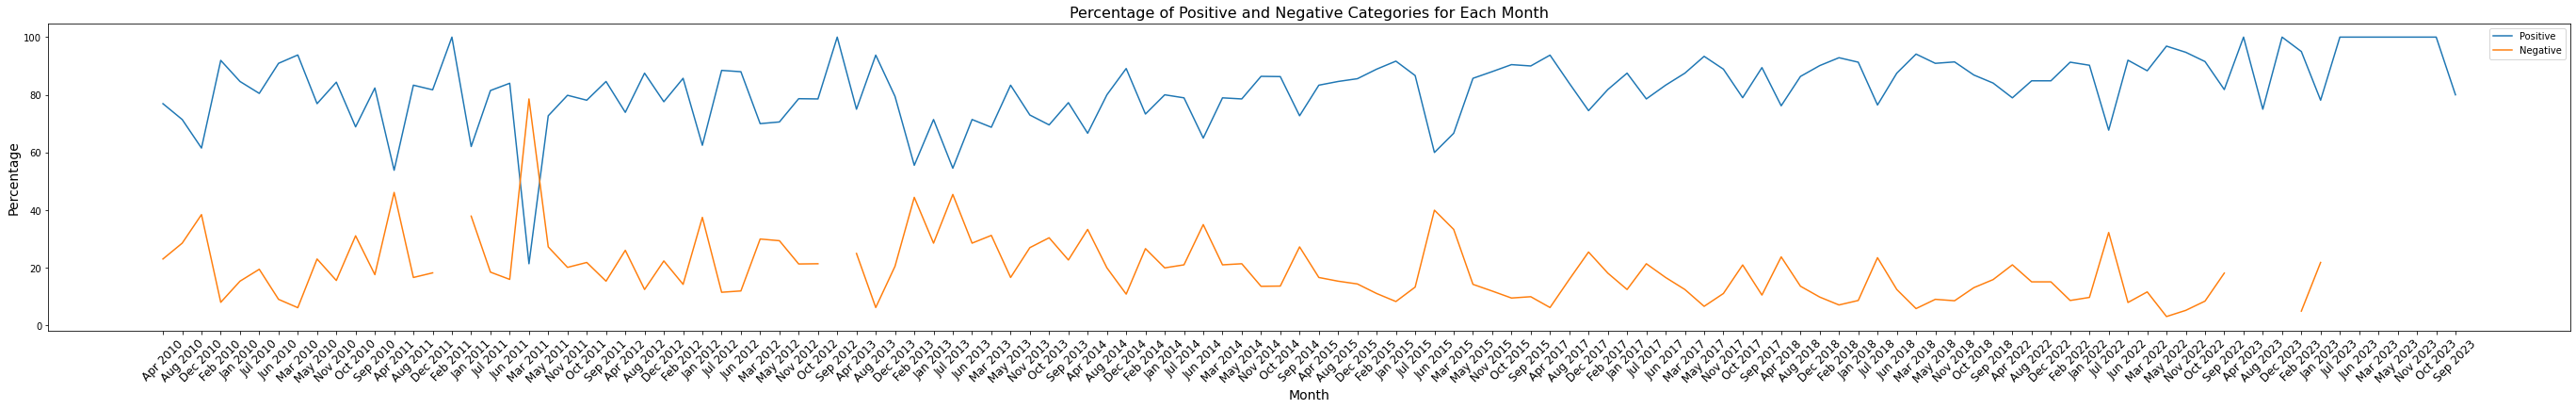

In [120]:
# Convert the Date column to a pandas datetime object
smarties['Date'] = pd.to_datetime(smarties['Date'], format='%d-%m-%Y')

# Create new columns for the year and month
smarties['Year'] = smarties['Date'].dt.year
smarties['Month'] = smarties['Date'].dt.strftime('%b %Y')

# Calculate the total count of tweets for each year and month
total_counts = smarties.groupby(['Year', 'Month'])['Polarity'].count()

# Calculate the percentage of positive and negative sentiment for each year and month
positive_perc = smarties[smarties['Polarity'] == 'Positive'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100
negative_perc = smarties[smarties['Polarity'] == 'Negative'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100

# Plot the percentages
fig, ax = plt.subplots(figsize=(48,6))
ax.plot(positive_perc.index.get_level_values(1), positive_perc.values, label='Positive')
ax.plot(negative_perc.index.get_level_values(1), negative_perc.values, label='Negative')

# Add labels and legend
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Percentage of Positive and Negative Categories for Each Month', fontsize=16)
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.legend()

# Show the plot
plt.show()

### Monthly Line plot for polarity from 2010-2013

C:\Users\HP\AppData\Local\Temp/ipykernel_21116/1709474030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smarties_2010_2013['Year'] = smarties_2010_2013['Date'].dt.year
C:\Users\HP\AppData\Local\Temp/ipykernel_21116/1709474030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smarties_2010_2013['Month'] = smarties_2010_2013['Date'].dt.strftime('%b %Y')


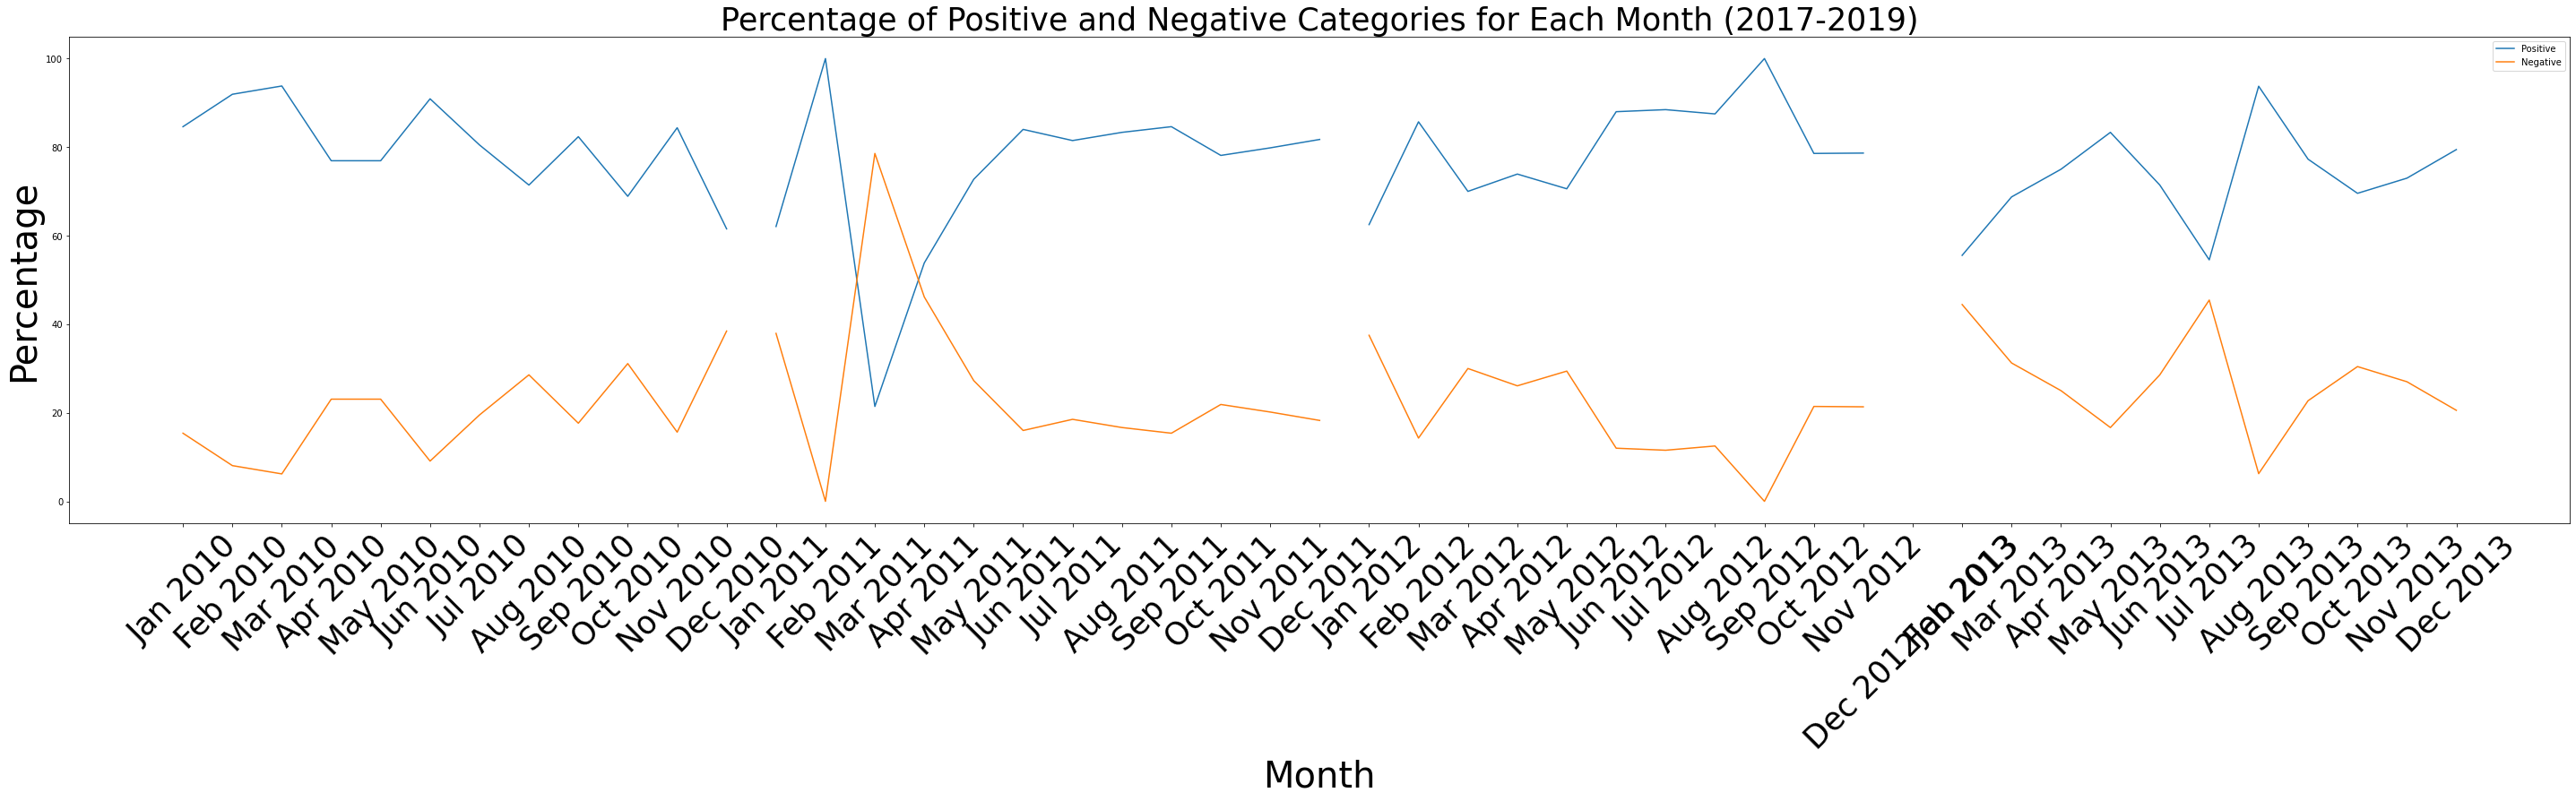

In [121]:
# Filter the data for years 2010-2013
smarties_2010_2013 = smarties[(smarties['Year'] >= 2010) & (smarties['Year'] <= 2013)]

# Create new columns for the year and month
smarties_2010_2013['Year'] = smarties_2010_2013['Date'].dt.year
smarties_2010_2013['Month'] = smarties_2010_2013['Date'].dt.strftime('%b %Y')

# Define a categorical data type for the month column with the correct order of months
month_order = ['Jan 2010', 'Feb 2010', 'Mar 2010', 'Apr 2010', 'May 2010', 'Jun 2010', 'Jul 2010', 'Aug 2010', 'Sep 2010', 'Oct 2010', 'Nov 2010', 'Dec 2010',
              'Jan 2011', 'Feb 2011', 'Mar 2011', 'Apr 2011', 'May 2011', 'Jun 2011', 'Jul 2011', 'Aug 2011', 'Sep 2011', 'Oct 2011', 'Nov 2011', 'Dec 2011',
              'Jan 2012', 'Feb 2012', 'Mar 2012', 'Apr 2012', 'May 2012', 'Jun 2012', 'Jul 2012', 'Aug 2012', 'Sep 2012', 'Oct 2012', 'Nov 2012', 'Dec 2012'
              'Jan 2013', 'Feb 2013', 'Mar 2013', 'Apr 2013', 'May 2013', 'Jun 2013', 'Jul 2013', 'Aug 2013', 'Sep 2013', 'Oct 2013', 'Nov 2013', 'Dec 2013']
month_cat = pd.Categorical(smarties_2010_2013['Month'], categories=month_order, ordered=True)

# Convert the Month column to the categorical data type with the correct ordering
smarties_2010_2013 = smarties_2010_2013.assign(Month=month_cat)

# Calculate the total count of tweets for each year and month
total_counts = smarties_2010_2013.groupby(['Year', 'Month'])['Polarity'].count()

# Calculate the percentage of positive and negative sentiment for each year and month
positive_perc = smarties_2010_2013[smarties_2010_2013['Polarity'] == 'Positive'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100
negative_perc = smarties_2010_2013[smarties_2010_2013['Polarity'] == 'Negative'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100

# Plot the percentages
fig, ax = plt.subplots(figsize=(50,10))
ax.plot(positive_perc.index.get_level_values(1), positive_perc.values, label='Positive')
ax.plot(negative_perc.index.get_level_values(1), negative_perc.values, label='Negative')

# Add labels and legend
ax.set_xlabel('Month', fontsize=40)
ax.set_ylabel('Percentage', fontsize=40)
ax.set_title('Percentage of Positive and Negative Categories for Each Month (2017-2019)', fontsize=35)
ax.tick_params(axis='x', labelrotation=45, labelsize=35)
ax.legend()

# Show the plot
plt.show() 

# There were ongoing concerns about child labor in the cocoa supply chains of companies like Nestle in 2011, with critics arguing that progress was slow and insufficient despite pledges to improve monitoring and remediation efforts.
# In 2012, Nestle changed the recipe of Smarties in the UK, which led to public backlash and a petition to bring back the original recipe. 
# In 2013, there was a controversy in the US related to the mislabeling of Smarties candy sold by Smarties Candy Company and Nestle's Smarties candy.

### Latent Dirichlet Allocation (LDA) for tweets from 2010-2013

In [122]:
# Filter tweets between 2010-2013
smarties_2010_2013 = smarties[(smarties['Year'] >= 2010) & (smarties['Year'] <= 2013)]

# Preprocess text data
preprocessed_data = []
for text in smarties_2010_2013['Text']:
    tokens = word_tokenize(text.lower())
    preprocessed_data.append(tokens)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_data)
corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

# Define the number of topics to extract
num_topics = 2

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics
for topic_id, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print("Topic:", topic_id)
    for word, weight in topic:
        print("\t", word, ":", weight)
# LDA to identify the topics that were most prevalent in the tweets during 2014-16, and then analyze those topics to determine what people's major concerns were during that time.

Topic: 0
	 smarti : 0.10884004
	 like : 0.009316618
	 candi : 0.008360088
	 chocol : 0.008160674
	 sweet : 0.0066227023
	 good : 0.0061037596
	 love : 0.005957175
	 eat : 0.0058152643
	 im : 0.0057985
	 smart : 0.0056458875
Topic: 1
	 smarti : 0.11308025
	 love : 0.024503332
	 like : 0.009259107
	 one : 0.008794099
	 chocol : 0.007425809
	 candi : 0.0069891512
	 rt : 0.0059199315
	 best : 0.0057868916
	 mampm : 0.0051973625
	 nerd : 0.004715838


### Monthly Line plot for polarity in 2015

C:\Users\HP\AppData\Local\Temp/ipykernel_21116/39762963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smarties_2015['Year'] = smarties_2015['Date'].dt.year
C:\Users\HP\AppData\Local\Temp/ipykernel_21116/39762963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smarties_2015['Month'] = smarties_2015['Date'].dt.strftime('%b %Y')


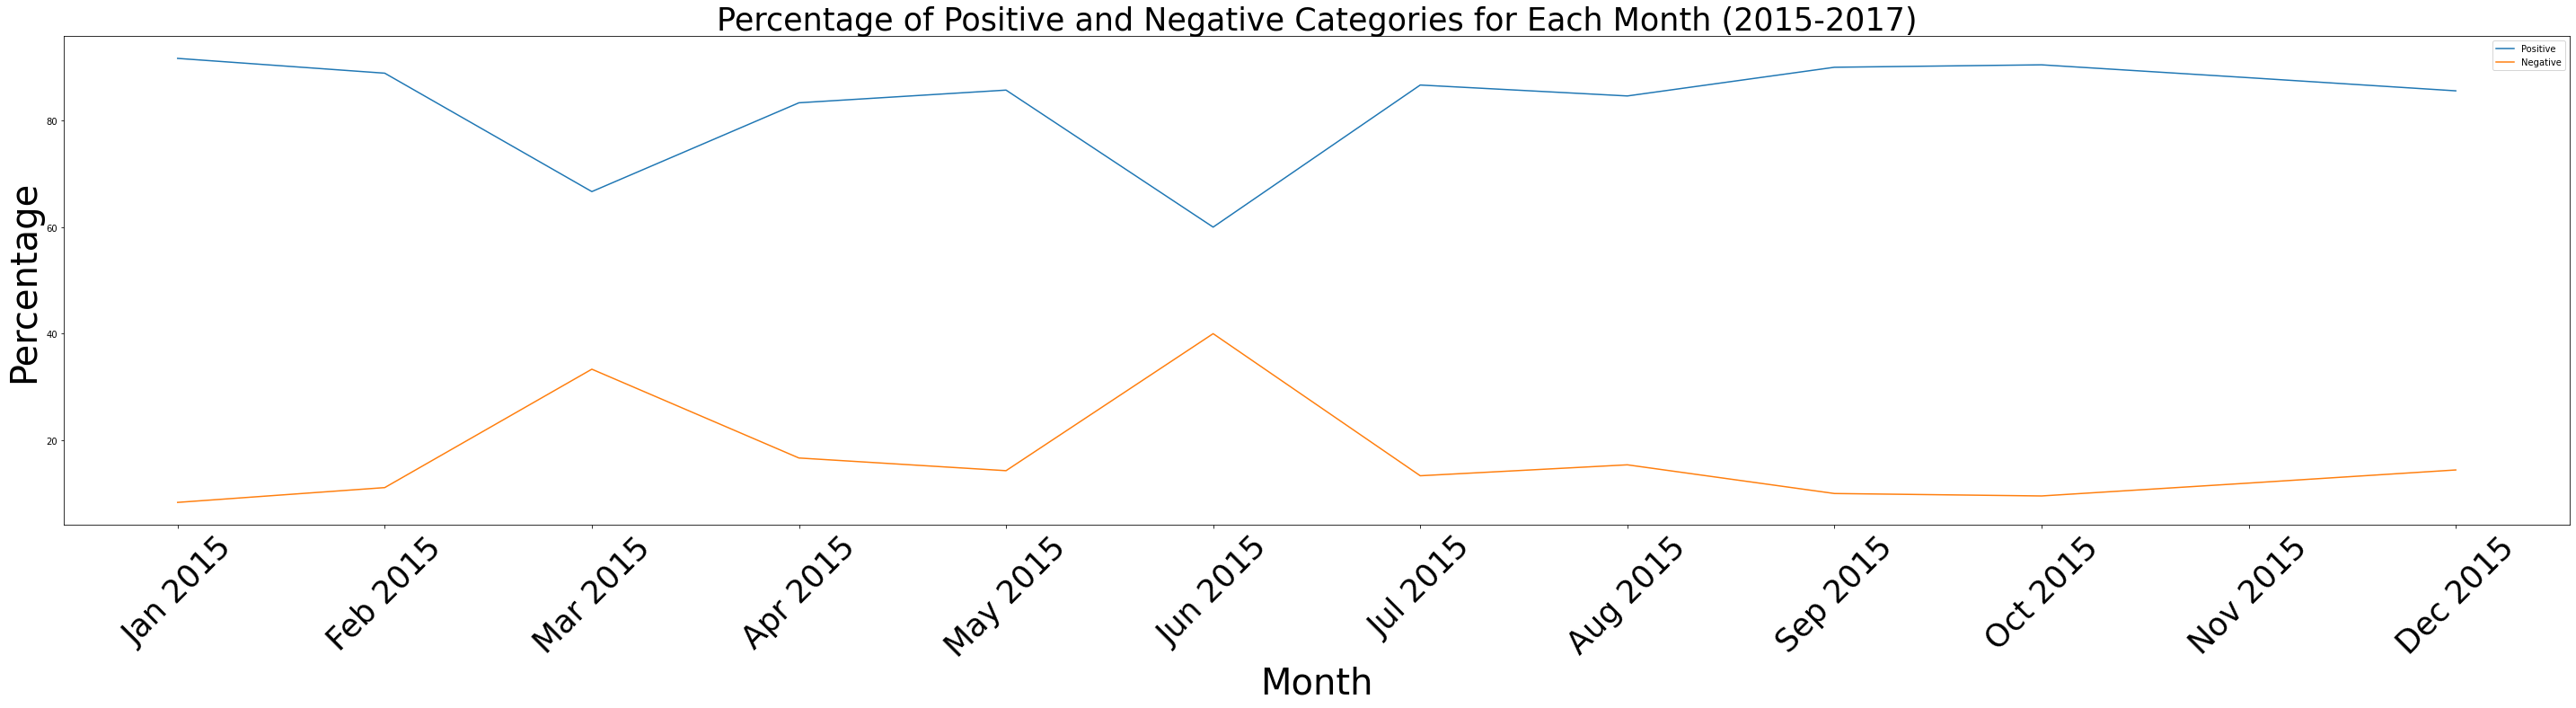

In [123]:
# Filter the data for years 2015-2017
smarties_2015 = smarties[(smarties['Year'] == 2015)]

# Create new columns for the year and month
smarties_2015['Year'] = smarties_2015['Date'].dt.year
smarties_2015['Month'] = smarties_2015['Date'].dt.strftime('%b %Y')

# Define a categorical data type for the month column with the correct order of months
month_order = ['Jan 2015', 'Feb 2015', 'Mar 2015', 'Apr 2015', 'May 2015', 'Jun 2015', 'Jul 2015', 'Aug 2015', 'Sep 2015', 'Oct 2015', 'Nov 2015', 'Dec 2015',]
month_cat = pd.Categorical(smarties_2015['Month'], categories=month_order, ordered=True)

# Convert the Month column to the categorical data type with the correct ordering
smarties_2015 = smarties_2015.assign(Month=month_cat)

# Calculate the total count of tweets for each year and month
total_counts = smarties_2015.groupby(['Year', 'Month'])['Polarity'].count()

# Calculate the percentage of positive and negative sentiment for each year and month
positive_perc = smarties_2015[smarties_2015['Polarity'] == 'Positive'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100
negative_perc = smarties_2015[smarties_2015['Polarity'] == 'Negative'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100

# Plot the percentages
fig, ax = plt.subplots(figsize=(50,10))
ax.plot(positive_perc.index.get_level_values(1), positive_perc.values, label='Positive')
ax.plot(negative_perc.index.get_level_values(1), negative_perc.values, label='Negative')

# Add labels and legend
ax.set_xlabel('Month', fontsize=40)
ax.set_ylabel('Percentage', fontsize=40)
ax.set_title('Percentage of Positive and Negative Categories for Each Month (2015-2017)', fontsize=35)
ax.tick_params(axis='x', labelrotation=45, labelsize=35)
ax.legend()

# Show the plot
plt.show()


# In 2015, Nestle also faced a lawsuit from a group of consumers in the United States over the alleged use of forced labor in its supply chain.
# It is possible that the lawsuit and concerns over forced labor in Nestle's supply chain could have had an impact on consumer sentiment toward all Nestle products, including Smarties.

### Latent Dirichlet Allocation (LDA) for tweets in 2015

In [124]:
# Filter tweets for 2015
smarties_2015 = smarties[(smarties['Year'] == 2015)]

# Preprocess text data
preprocessed_data = []
for text in smarties_2015['Text']:
    tokens = word_tokenize(text.lower())
    preprocessed_data.append(tokens)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_data)
corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

# Define the number of topics to extract
num_topics = 2

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics
for topic_id, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print("Topic:", topic_id)
    for word, weight in topic:
        print("\t", word, ":", weight)


Topic: 0
	 smarti : 0.09887197
	 award : 0.017144367
	 love : 0.016308464
	 winner : 0.015404916
	 2015 : 0.0150858145
	 campaign : 0.014165829
	 amp : 0.013795436
	 best : 0.012263891
	 mobil : 0.011705733
	 candi : 0.008587612
Topic: 1
	 smarti : 0.10439351
	 campaign : 0.019028187
	 winner : 0.016337316
	 mobil : 0.013677099
	 award : 0.012877838
	 galleri : 0.010038896
	 2015 : 0.009905383
	 showcas : 0.008746989
	 win : 0.008591498
	 see : 0.007984922


### WORDCLOUD for Overall Text

In [125]:
# convert the data type of the 'Text' column in the 'smarties' dataframe to a string, and assigns it to a new column called 'text'
smarties['text'] = smarties['Text'].astype(str)

# create new string variable called 'text' by joining all the strings in the 'text' column together using a space as a separator
text = ' '.join(smarties['text'])

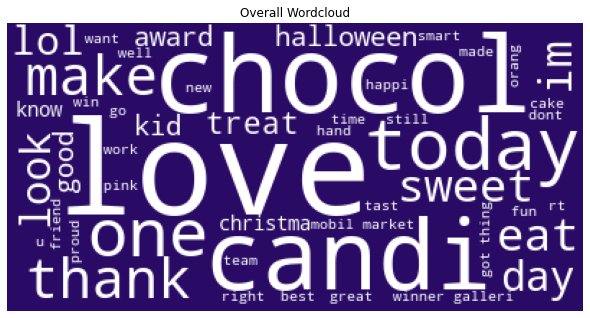

In [126]:
# import the STOPWORDS set from the WordCloud library
stopwords = set(STOPWORDS)

# add some additional stopwords related to the brands "smarti", "nestl", "nestle" and "amp"
stopwords.add('smarti')
stopwords.add('smarti smarti')
stopwords.add('nestl')
stopwords.add('nestle')
stopwords.add('amp') # amp refers to the HTML entity for an ampersand (&)

# Set the background color to dark blue
background_color = '#290B66'

# Set the text color to white
text_color = 'white'

# Set the maximum number of words to 40
max_words = 50


# generate a WordCloud object with the updated stopwords
#wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=1200, height=800).generate(text)

wordcloud = WordCloud(stopwords=stopwords, background_color=background_color, color_func=lambda *args, **kwargs: text_color, max_words=max_words).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off') # turns off the axis display
plt.tight_layout(pad=0) # ets the layout to be tight
plt.title('Overall Wordcloud')

plt.show()

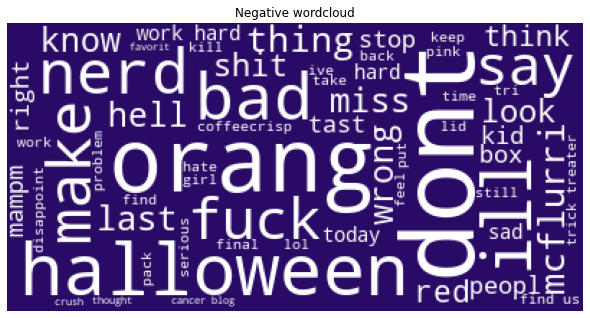

In [147]:
# import the STOPWORDS set from the WordCloud library
stopwords = set(STOPWORDS)

# add some additional stopwords related to the brands "smarti", "nestl", "nestle" and "amp"
stopwords.add('smarti')
stopwords.add('smarti smarti')
stopwords.add('nestl')
stopwords.add('nestle')
stopwords.add('amp') # amp refers to the HTML entity for an ampersand (&)
stopwords.add('go')
stopwords.add('im')
stopwords.add('one')
stopwords.add('candi')
stopwords.add('chocol')
stopwords.add('eat')
stopwords.add('got')
stopwords.add('day')
stopwords.add('realli')
stopwords.add('rt')
stopwords.add('oh')

# Set the background color to dark blue
background_color = '#290B66'

# Set the text color to white
text_color = 'white'

# Set the maximum number of words to 40
max_words = 60


# generate a WordCloud object with the updated stopwords
#wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=1200, height=800).generate(text)

wordcloud = WordCloud(stopwords=stopwords, background_color=background_color, color_func=lambda *args, **kwargs: text_color, max_words=max_words).generate(smarties[smarties['Polarity']=='Negative']['Text'].str.cat(sep=" "))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off') # turns off the axis display
plt.tight_layout(pad=0) # ets the layout to be tight
plt.title('Negative wordcloud')
plt.show()

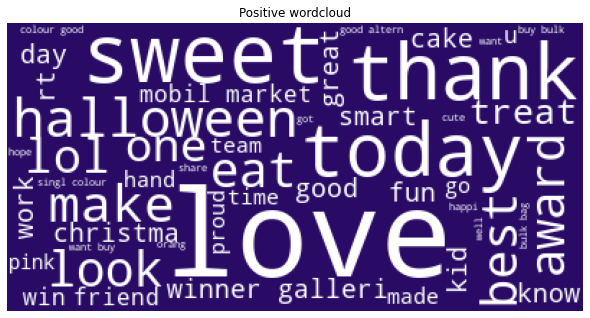

In [128]:
# import the STOPWORDS set from the WordCloud library
stopwords = set(STOPWORDS)

# add some additional stopwords related to the brands "smarti", "nestl", "nestle" and "amp"
stopwords.add('smarti')
stopwords.add('smarti smarti')
stopwords.add('nestl')
stopwords.add('nestle')
stopwords.add('amp') # amp refers to the HTML entity for an ampersand (&)
stopwords.add('candi')
stopwords.add('chocol')
stopwords.add('im')

# Set the background color to dark blue
background_color = '#290B66'

# Set the text color to white
text_color = 'white'

# Set the maximum number of words to 40
max_words = 50


# generate a WordCloud object with the updated stopwords
#wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=1200, height=800).generate(text)

wordcloud = WordCloud(stopwords=stopwords, background_color=background_color, color_func=lambda *args, **kwargs: text_color, max_words=max_words).generate(smarties[smarties['Polarity']=='Positive']['Text'].str.cat(sep=" "))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off') # turns off the axis display
plt.tight_layout(pad=0) # ets the layout to be tight
plt.title('Positive wordcloud')
plt.show()

### Positive and Negative Wordcloud

In [129]:
# create positive_data by selecting rows from smarties where the 'Polarity' column is equal to the string 'Positive'
positive_data = smarties[smarties['Polarity'] == 'Positive']

# create negative_data by selecting rows from smarties where the 'Polarity' column is equal to the string 'Negative'
negative_data = smarties[smarties['Polarity'] == 'Negative']

# Combine the text data for each category into a single string
positive_text = ' '.join(positive_data['Text'])
negative_text = ' '.join(negative_data['Text'])

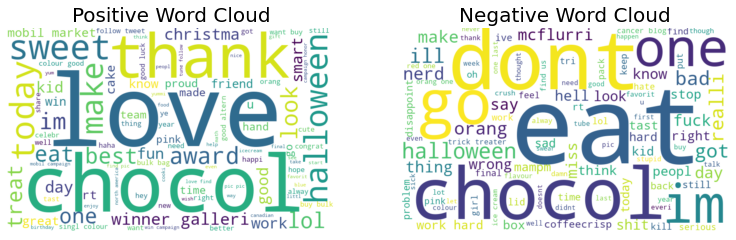

In [130]:
# import the STOPWORDS set from the WordCloud library
stopwords = set(STOPWORDS)

# add some additional stopwords related to the brands "smarti", "nestl", "nestle" and "amp"
stopwords.add('smarti')
stopwords.add('candi')
stopwords.add('nestl')
stopwords.add('nestle')
stopwords.add('noodl')
stopwords.add('amp')

# Generate the word clouds for each category with updated stopwords
positive_wordcloud = WordCloud(stopwords=stopwords,width=800, height=500, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(positive_text)
negative_wordcloud = WordCloud(stopwords=stopwords,width=800, height=500, background_color='white', max_words=100, contour_width=3, contour_color='firebrick').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud', fontsize=20)

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud', fontsize=20)

plt.show()

### DAILY DATA

In [131]:
smarties.head(3)

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Sentiment Score,Polarity,Weighted_Sentiment_Score,text,Month
166,2010-11-28,spoke nestl last week confirm halal uk qt smar...,0,0,159,2010,0.4215,Positive,67.0185,spoke nestl last week confirm halal uk qt smar...,Nov 2010
486,2010-10-14,nestl fight obes buy 60 kit kat pack smarti mi...,0,0,1369,2010,-0.3818,Negative,-522.6842,nestl fight obes buy 60 kit kat pack smarti mi...,Oct 2010
526,2010-09-10,cut chocol diet cocoa bean pick child africa n...,0,0,176,2010,-0.8885,Negative,-156.3760,cut chocol diet cocoa bean pick child africa n...,Sep 2010


In [132]:
# convert the 'Date' column to datetime format
smarties['Date'] = pd.to_datetime(smarties['Date'])

# group the tweets by day and count the number of tweets on each day
tweet_count = smarties.groupby(smarties['Date'].dt.date).size().reset_index(name='count')

print(type(tweet_count))

<class 'pandas.core.frame.DataFrame'>


In [133]:
min = tweet_count.min()
max = tweet_count.max()
mean = tweet_count.mean()

print('Minimum count :',min,'Maximum count :', max,'Mean count :',mean)

Minimum count : Date     2010-01-09
count             1
dtype: object Maximum count : Date     2023-12-03
count           218
dtype: object Mean count : count    7.62818
dtype: float64


C:\Users\HP\AppData\Local\Temp/ipykernel_21116/3620070332.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = tweet_count.mean()


In [134]:
# calculates the weighted sentiment score for each tweet based on the sentiment score and the follower count of the user who posted the tweet
smarties['Weighted_Sentiment_Score'] = smarties['Sentiment Score'] * (smarties['Follower Count'])
smarties.head(3)

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Sentiment Score,Polarity,Weighted_Sentiment_Score,text,Month
166,2010-11-28,spoke nestl last week confirm halal uk qt smar...,0,0,159,2010,0.4215,Positive,67.0185,spoke nestl last week confirm halal uk qt smar...,Nov 2010
486,2010-10-14,nestl fight obes buy 60 kit kat pack smarti mi...,0,0,1369,2010,-0.3818,Negative,-522.6842,nestl fight obes buy 60 kit kat pack smarti mi...,Oct 2010
526,2010-09-10,cut chocol diet cocoa bean pick child africa n...,0,0,176,2010,-0.8885,Negative,-156.3760,cut chocol diet cocoa bean pick child africa n...,Sep 2010


In [135]:
# Group the data by day 
daily_data = smarties.groupby(smarties['Date'].dt.date).agg({'Weighted_Sentiment_Score': 'sum', 'Like Count': 'sum', 'Retweet Count': 'sum', 'Follower Count': 'sum'}).reset_index()

# calculate the weighted average sentiment score for each day based on the follower counts
daily_data['Daily_Avg_Sentiment_Score'] = daily_data['Weighted_Sentiment_Score'] /(daily_data['Follower Count'])

# Print the resulting dataframe
daily_data.head()

,Date,Weighted_Sentiment_Score,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score
0,2010-01-09,10497.5499,0,0,13005,0.807193
1,2010-01-10,315.8838,0,1,527,0.599400
2,2010-01-11,5503.4190,0,1,10446,0.526845
3,2010-01-12,203.1711,0,0,319,0.636900
4,2010-02-07,535768.7568,1,63,922485,0.580789


In [136]:
# Calculate tweet volume
tweet_vol = smarties.groupby(smarties['Date'].dt.date).size().reset_index(name='Tweet Volume')
tweet_vol.head(3)

,Date,Tweet Volume
0,2010-01-09,5
1,2010-01-10,1
2,2010-01-11,6


In [137]:
# Merge tweet volume data with daily_data
daily_data = daily_data.merge(tweet_vol, on='Date', how='left')

daily_data.head()

,Date,Weighted_Sentiment_Score,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
0,2010-01-09,10497.5499,0,0,13005,0.807193,5
1,2010-01-10,315.8838,0,1,527,0.599400,1
2,2010-01-11,5503.4190,0,1,10446,0.526845,6
3,2010-01-12,203.1711,0,0,319,0.636900,1
4,2010-02-07,535768.7568,1,63,922485,0.580789,174


In [138]:
# Drop the column 'Weighted_Sentiment_Score'
daily = daily_data.drop('Weighted_Sentiment_Score', axis=1)
daily.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
0,2010-01-09,0,0,13005,0.807193,5
1,2010-01-10,0,1,527,0.599400,1
2,2010-01-11,0,1,10446,0.526845,6
3,2010-01-12,0,0,319,0.636900,1
4,2010-02-07,1,63,922485,0.580789,174


In [139]:
# define a function to map the sentiment scores to categories
def get_sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# map the sentiment scores to categories and create a new 'category' column
daily['Polarity'] = daily['Daily_Avg_Sentiment_Score'].apply(get_sentiment_category)

# print the first 10 rows of the dataframe to verify the results
daily.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume,Polarity
0,2010-01-09,0,0,13005,0.807193,5,Positive
1,2010-01-10,0,1,527,0.599400,1,Positive
2,2010-01-11,0,1,10446,0.526845,6,Positive
3,2010-01-12,0,0,319,0.636900,1,Positive
4,2010-02-07,1,63,922485,0.580789,174,Positive


In [140]:
# Value_count for each category of 'Polarity'
daily['Polarity'].value_counts()

Positive    877
Negative    118
Neutral      27
Name: Polarity, dtype: int64

In [141]:
# eliminate the tweets with 'Neutral' sentiment and to focus analysis on the tweets that have a stronger emotional content
daily = daily[daily['Polarity']!='Neutral']
daily['Polarity'].value_counts()

Positive    877
Negative    118
Name: Polarity, dtype: int64

<AxesSubplot:xlabel='Year'>

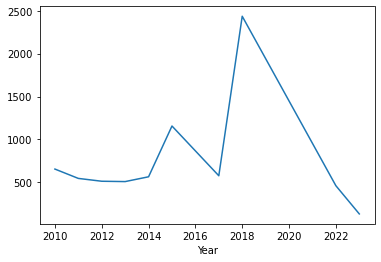

In [142]:
# Create a column for Year
daily['Year'] = pd.DatetimeIndex(daily['Date']).year

# Group the data by year, and calculates the total number of tweets per year using the 'Tweet Volume' column
yearly_tweet_volume = daily.groupby(['Year'])['Tweet Volume'].sum()

# Create a line plot of the yearly tweet volume
yearly_tweet_volume.plot() # There was a huge spike in tweet volume in 2015 when 'Maggi' was banned

In [143]:
yearly_tweet_volume

Year
2010     654
2011     545
2012     512
2013     508
2014     564
2015    1156
2017     576
2018    2436
2022     460
2023     131
Name: Tweet Volume, dtype: int64

In [47]:
yearly_tweet_volume.to_csv('smartie_tweet_vol.csv')

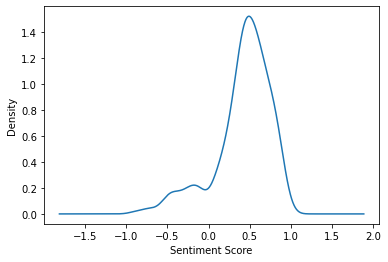

In [34]:
# Plot the distribution of sentiment scores in a density plot
daily['Daily_Avg_Sentiment_Score'].plot(kind='density')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

## NESTLE UK  STOCKS

In [35]:
# Smarties are particularly popular in the UK, where they are produced and sold extensively. The UK is one of the largest markets for Smarties, and as a result, any major changes or incidents related to the brand would likely have a significant impact on the UK stocks of Nestle, the company that owns the Smarties brand.
# Nestle a secondary listing on the London Stock Exchange (LSE) in the UK.

In [49]:
import yfinance as yf

In [78]:
# Set the start and end date for the data
start_date = "2010-01-01"
end_date = "2023-03-28"

# Retrieve historical stock data
nestle_data = yf.download('NSRGF', start=start_date, end=end_date)

# converting to dataframe
nestle = pd.DataFrame(nestle_data)
nestle.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,49.000000,49.650002,49.000000,49.400002,41.743717,7800
2010-01-05,48.549999,48.549999,48.090000,48.099998,40.645199,3300
2010-01-06,47.660000,47.849998,47.330002,47.849998,40.433945,11700
2010-01-07,47.200001,47.360001,46.900002,47.000000,39.715683,4900
2010-01-08,47.590000,48.250000,47.150002,48.250000,40.771950,11000


In [79]:
# resulting object, nestle_yearly, will contain the mean closing prices of Nestle stock for each year in the original data
nestle_yearly = nestle['Close'].resample(rule='A').mean()

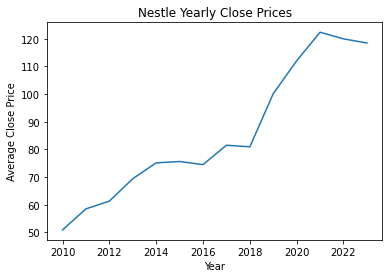

In [83]:
# create a line plot of the resampled Nestle stock closing prices
plt.plot(nestle_yearly.index.year, nestle_yearly.values)
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Nestle Yearly Close Prices')
plt.show() 

# There was minor decrease in stock value in 2015 correspoding to the negative sentiment.
# No significant decrease can be noted otherwise

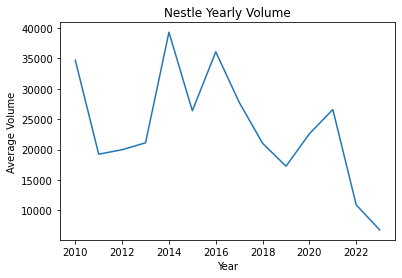

In [82]:
# resample the trading volume of Nestle stock on a yearly basis and computes the average trading volume for each year
nestle_yearlyvol = nestle['Volume'].resample(rule='A').mean()

# plot the resampled values of the average trading volume on the y-axis and the years on the x-axis
plt.plot(nestle_yearlyvol.index.year, nestle_yearlyvol.values)

plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.title('Nestle Yearly Volume')
plt.show() 

# The decline of stock volume in 2011 volume corresponds to the decrease in positive sentiment during the priod.
# There was a major drop in volume of Nestle stock in 2017. Some, but not all of these dates correspond to issues related to Smarties.

# COMBINING TWITTER AND STOCK DATA

In [81]:
# Removing 'Date' column as the index and checking its data type

nestle_data = nestle_data.reset_index()
nestle_data['Date'].dtype

dtype('<M8[ns]')

In [82]:
# convert the data type of 'Date' column to datetime.
daily['Date'] = pd.to_datetime(daily['Date'])

# check the data type of the 'Date' column again
print(daily['Date'].dtype)

datetime64[ns]


In [83]:
# Merge tweet and stocks data to form a single dataset.
stock = pd.merge(daily,nestle_data, on='Date')
stock.columns

Index(['Date', 'Like Count', 'Retweet Count', 'Follower Count',
       'Daily_Avg_Sentiment_Score', 'Tweet Volume', 'Polarity', 'Year', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype='object')

In [84]:
# Remove unwanted columns from the dataset.
# Adj. CLose price and volume are the only relevant stock data for the study.
stock = stock.drop(['Open', 'High', 'Low', 'Close'], axis=1)

In [85]:
# Calculating Price difference between two days using the Adj. Closing price.
stock['Price Difference'] = stock['Adj Close'].diff()
stock.dropna(inplace=True)

# Adding column 'Stock Trend' where value is 1 when price difference > 0, and 0 otherwise.
Rise = 1
Fall = 0

stock['Stock Trend'] = np.where(stock['Price Difference']>0, Rise, Fall)

In [86]:
# Converting the categorical column ' Polarity' into numeric using encoding.
stock['Polarity'] = stock["Polarity"].map({"Positive": 1, "Negative": 0})
stock.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume,Polarity,Year,Adj Close,Volume,Price Difference,Stock Trend
1,2010-01-12,0,0,319,0.636900,1,1,2010,40.771950,86000,0.126751,1
2,2010-02-09,0,0,16369,0.410814,6,1,2010,38.997425,9800,-1.774525,0
3,2010-02-10,0,0,1565,-0.542300,1,0,2010,38.701668,1600,-0.295757,0
4,2010-02-11,0,0,1847,0.456599,3,1,2010,39.462181,700,0.760513,1
5,2010-02-12,0,0,238,0.520233,2,1,2010,39.039669,3100,-0.422512,0


## CORRELATION ANALYSIS

In [87]:
# Checking the relationship between variables. Particularly checking what variables have a significant correlation coefficient.

In [88]:
# define a list of variables that are of interest in the dataset
variables = ['Like Count', 'Retweet Count', 'Follower Count',
       'Daily_Avg_Sentiment_Score', 'Tweet Volume', 'Polarity', 'Year',
       'Adj Close', 'Volume', 'Price Difference', 'Stock Trend']
# compute the Pearson correlation coefficient and p-value for all possible pairs of variables in a dataset
for var1, var2 in itertools.combinations(variables, 2): #  itertools.combinations() function to iterate over all possible pairs of variables in the variables list.
    corr_coef, p_value = pearsonr(stock[var1], stock[var2])
    # prints the results for pairs with a statistically significant correlation (i.e., p-value less than 0.05).
    if p_value < 0.05:
        print(var1 + ' and ' + var2 + ': correlation coefficient = {:.2f}, p-value = {:.2f}'.format(corr_coef, p_value))

Like Count and Retweet Count: correlation coefficient = 0.96, p-value = 0.00
Like Count and Tweet Volume: correlation coefficient = 0.27, p-value = 0.00
Like Count and Year: correlation coefficient = 0.11, p-value = 0.00
Like Count and Adj Close: correlation coefficient = 0.08, p-value = 0.03
Retweet Count and Tweet Volume: correlation coefficient = 0.14, p-value = 0.00
Follower Count and Tweet Volume: correlation coefficient = 0.20, p-value = 0.00
Daily_Avg_Sentiment_Score and Polarity: correlation coefficient = 0.81, p-value = 0.00
Daily_Avg_Sentiment_Score and Year: correlation coefficient = 0.17, p-value = 0.00
Daily_Avg_Sentiment_Score and Adj Close: correlation coefficient = 0.15, p-value = 0.00
Tweet Volume and Polarity: correlation coefficient = 0.10, p-value = 0.01
Tweet Volume and Year: correlation coefficient = -0.10, p-value = 0.01
Tweet Volume and Adj Close: correlation coefficient = -0.20, p-value = 0.00
Polarity and Year: correlation coefficient = 0.09, p-value = 0.01
Ye